# The Recommender System Predict

© Explore Data Science Academy

---
### Honour Code

I {**DIANE, GOVINDAN**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EDSA Movie Recommendation Predict

https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/overview

**Description**

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options. ...ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you? ![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2Fbca114f2e4f6b9b46f2cc76527d7401e%2FImage_header.png?generation=1593773828621598&alt=media) ...it's not just a guess drawn out of the hat. There is an algorithm behind it. With this context, EDSA is challenging you to construct a recommendation algorithm based on **content** or **collaborative** filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences. ### What value is achieved through building a functional recommender system? Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. !

**Evaluation**

The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process. 


**Submission Format**

For every author in the dataset, submission files should contain two columns: Id and rating. Id is a concatenation of the userID and movieID given in the test file (using an _ character). rating is the predicted rating for a given user-movie pair

The file should contain a header and have the following format:

Id,rating

1_2011,1.0

**Data**

genome_scores.csv - a score mapping the strength between movies and tag-related properties. 

genome_tags.csv - user assigned tags for genome-related scores

imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.

links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.

sample_submission.csv - Sample of the submission format for the hackathon.

tags.csv - User assigned for the movies within the dataset.

test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.

train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.graphics.correlation import plot_corr
from scipy.stats import pearsonr
from sklearn.utils import resample

# Libraries for data preparation and model building
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
import catboost as ctb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import PassiveAggressiveClassifier

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')


In [2]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [53]:
# load the data



df_test = pd.read_csv('rs_test.csv')
df_tags = pd.read_csv('tags.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_movies = pd.read_csv('movies.csv')
df_links = pd.read_csv('links.csv')
df_imdb_data = pd.read_csv('imdb_data.csv')


In [199]:
filename = 'rs_train.csv'
n = sum(1 for line in open(filename)) - 1   #10000038
s = 1000
random.seed(47)
skip = sorted(random.sample(range(1,n+1),n-s))
df_train = pd.read_csv(filename, skiprows=skip)


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [200]:
# Look at Data provided 
df_train.head()


,userId,movieId,rating,timestamp
0,65185,1221,5.0,1399148438
1,65868,5299,3.5,1467232974
2,63400,1202,4.0,1487699583
3,67860,380,2.5,1222787787
4,123770,225,4.0,841296479


In [201]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [202]:
max_movies = df_train['movieId'].max()
max_movies

196889

In [203]:
df_train['movieId'].max()

196889

In [172]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [173]:
df_test['userId'].max()

162541

In [174]:
df_test['movieId'].max()

209163

In [175]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [176]:
df_tags['movieId'].max()

209063

In [177]:
df_tags['userId'].max()

162534

In [178]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [64]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [179]:
df_genome_scores['movieId'].max()

206499

In [180]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [97]:
df_movies['movieId'].max()

209171

In [68]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [98]:
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [99]:
df_imdb_data['movieId'].max()

131262

In [140]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          1000 non-null   int64  
 1   movieId         1000 non-null   int64  
 2   rating          1000 non-null   float64
 3   timestamp       1000 non-null   int64  
 4   userId_movieId  1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [181]:
# Create movie features matrix

df_movies_content = pd.merge(df_movies, df_imdb_data, on=['movieId'], how='left')
#df_movies_content = df_movies_content.drop(['budget'], axis = 1)
#df_movies_content = df_movies_content.drop(['budget'], axis = 1)
#df_movies_content = df_movies_content[:max_movies+1]
df_movies_content  = df_movies_content[df_movies_content['movieId'] <= max_movies+1]

df_movies_content.tail()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
56888,195155,B&B (2017),Thriller,NaN,NaN,NaN,NaN,NaN
56889,195157,Crazy About Tiffany's (2016),Documentary,NaN,NaN,NaN,NaN,NaN
56890,195159,Spider-Man: Into the Spider-Verse (2018),Action|Adventure|Animation|Sci-Fi,NaN,NaN,NaN,NaN,NaN
56891,195161,Mary Poppins Returns (2018),Children|Fantasy,NaN,NaN,NaN,NaN,NaN
56892,195163,Bumblebee (2018),Action|Adventure|Sci-Fi,NaN,NaN,NaN,NaN,NaN


In [182]:
df_movies_content['movieId'].max()

195163

In [183]:
# Create users features matrix

df_users_info = pd.merge(df_tags, df_train, on=['movieId', 'userId'])
df_users_info = df_users_info.drop(['timestamp_x','timestamp_y'], axis = 1)
df_users_info.head()

,userId,movieId,tag,rating,userId_movieId
0,21345,98961,politics,4.0,21345_98961
1,70092,8266,Betamax,4.0,70092_8266
2,70092,97817,Betamax,4.0,70092_97817
3,110243,8807,drugs,3.0,110243_8807
4,112887,194016,existential crisis,5.0,112887_194016


In [184]:
# reindex tables

df_users_info = df_train
df_users_info['userId_movieId'] = df_users_info['userId'].apply(str) + "_" + df_users_info['movieId'].apply(str)

df_users_info = df_users_info.drop(['timestamp'], axis = 1)
df_users_info.tail(100)


,userId,movieId,rating,userId_movieId
900,110752,1212,5.0,110752_1212
901,39651,2291,2.0,39651_2291
902,149844,3864,3.0,149844_3864
903,132731,2395,3.5,132731_2395
904,157628,44665,3.0,157628_44665
...,...,...,...,...
995,51200,223,5.0,51200_223
996,134225,357,5.0,134225_357
997,154442,3163,5.0,154442_3163
998,52459,1380,2.0,52459_1380


In [ ]:
# Clean up columns to be added to df movies 

In [145]:
#book ratings similar to users matrix above

#books is book contents matrix similar to movies

df_movies_content['director_tags'] = (pd.Series(df_movies_content[['director','plot_keywords']]
                                                .fillna('').values.tolist()).str.join(' '))

# indexes to map between movie titles and indexes of the movies dataframe
#titles = df_movies_content['title']
indices = pd.Series(df_movies_content.index, index=df_movies_content['movieId'])

In [146]:
df_movies_content.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,director_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,John Lasseter toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jonathan Hensleigh board game|adventurer|fight...
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Mark Steven Johnson boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Terry McMillan black american|husband wife rel...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Albert Hackett fatherhood|doberman|dog|mansion


In [106]:
#titles.head()


In [147]:
indices.tail()

movieId
195155    56888
195157    56889
195159    56890
195161    56891
195163    56892
dtype: int64

In [ ]:
# clean text - lowercase, combine, etc

In [148]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie, with TF-IDF features as columns 
tf_directorTags_matrix = tf.fit_transform(df_movies_content['director_tags'])

In [149]:
print (tf_directorTags_matrix.shape)

(56893, 93029)


In [150]:
#try PCA
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

svd = TruncatedSVD(n_components = 200)

svd_trunc_tf_directorTags_matrix = csr_matrix(svd.fit_transform(tf_directorTags_matrix))


In [151]:
#print (svd_trunc_tf_directorTags_matrix.shape)
print (tf_directorTags_matrix.shape)

(56893, 93029)


In [152]:

normalized_df = svd_trunc_tf_directorTags_matrix.astype(np.float32)

cosine_sim_directorTags = cosine_similarity(normalized_df, normalized_df)

print (cosine_sim_directorTags.shape)

MemoryError: Unable to allocate 12.1 GiB for an array with shape (56893, 56893) and data type float32

In [114]:
cosine_sim_directorTags[:5]

array([[ 0.9999999 , -0.03403043,  0.06843688, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03403043,  1.        ,  0.04186973, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06843688,  0.04186973,  1.0000001 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00993515,  0.00110359,  0.00891077, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01348324, -0.03369158, -0.02158324, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [136]:
def content_generate_rating_estimate(Comb_Id):
    
    k=20
    threshold=0.0
    
    user = int(Comb_Id.split('_')[0])
    movie_id = int(Comb_Id.split('_')[1])
     
    # Convert the movie id to a numeric index for our similarity matrix
    b_idx = indices[movie_id]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each movie the user has rated and the reference movie 
    for index, row in df_users_info[df_users_info['userId']==user].iterrows():
        sim = cosine_sim_directorTags[b_idx-1, indices[row['movieId']]-1]
        neighbors.append((sim, row['rating']))
    
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(df_users_info[df_users_info['movieId']==movie_id]['rating'])
    return predictedRating

In [137]:
indices[176101]

KeyError: 176101

In [138]:
#r = '5163_57669'.split('_')[0]

#r = content_generate_rating_estimate('146790_5459')
#print (r)
df_users_info['predictedRating'] = df_users_info['userId_movieId'].apply(content_generate_rating_estimate)

KeyError: 176101

#### Findings

There are no null values in the data set for cleaning/imputations. However, tweetid does not seem to provide any useful information to the analysis and should be considered to be dropped from the data

 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64


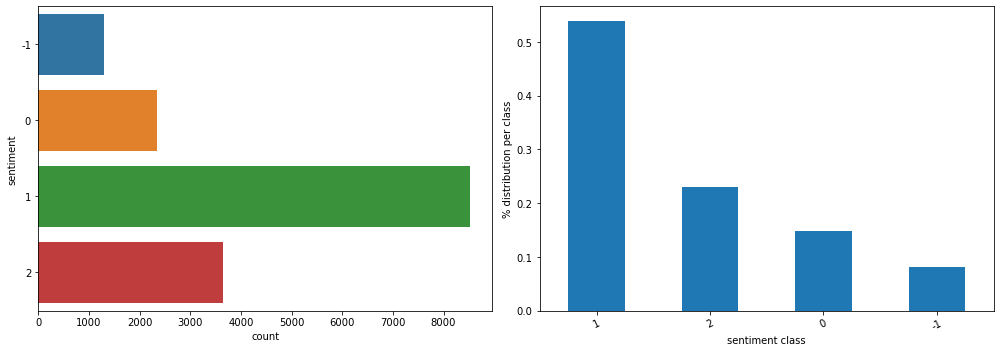

In [4]:
# Plotting frequency and proportions of sentiment classes (response variable) for train data

stats_sentiment = df_train['sentiment'].value_counts(normalize=True)
print(stats_sentiment)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=df_train,y='sentiment')
plt.subplot(1,2,2)
stats_sentiment.plot.bar(rot=25)
plt.ylabel('% distribution per class')
plt.xlabel('sentiment class')
plt.tight_layout()
plt.show()

#### Findings

Around 54% of the data tweets belong to class 1 (Pro climate change), while the remaining class proportions are significantly
smaller in comparison.This could lead to the model being biased where it is able to predict class 1 better than 
the other classes, and can incorrectly lead the audience to believe that the general tweet sentiment is pro climate change.
A possible consideration to balance the class imbalance of data, and reduce model bias is to try resampling 
the data (up/down/combination of both)


In [5]:
# reweights to be used in models to perform redistribution
cw = {-1: 0.46, 0:1.09, 1:1.67, 2:3.13}

In [6]:
# drop tweetid column
df_train = df_train.drop(['tweetid'], axis = 1)

In [7]:
# General analysis of tweets
row = 188
df_train['message'][row],df_train['sentiment'][row] 

('RT @LiterateLiberal: Leading global warming deniers just told us what they want trump to do https://t.co/tkZVNzDDd3 via @MotherJones',
 2)

#### Findings

There may be some correlations between the below possible features (to be engineered) and the relevant sentiment class:
1. Number of hastags in a tweet
2. If tweet is a RT
3. Number of @'s in a tweet
4. Presence and number of https links in a tweet
5. If there are ?, ! or ''/""  which could signal emotions
6. Tweet length (limit is 280 characters)


In [8]:
# Add Tweet length feature

# Converting of http link to http word only to remove bias due to length of link
# Some preprocessing is required as only the actual tweet length is to be summed. Counting chars only from : onwards for RT

def clean_http(text):
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'http', text) #remove the url and replace with http
    return text

def tweet_length(text):
    count = 0
    
    # search if RT then search the :, count from that
    if text[0:2]=='RT':
        pos = text.find(':')
        count = len(text[pos:])
    else: # if not RT, count length
        count = len(text)    
    
    return count


In [9]:
# run functions and apply to message column
df_train['message'] = df_train['message'].apply(clean_http)
df_train['tweet_length'] = df_train['message'].apply(tweet_length)
df_train.head()

,sentiment,message,tweet_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,121
1,1,It's not like we lack evidence of anthropogeni...,62
2,2,RT @RawStory: Researchers say we have three ye...,94
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103


In [10]:
# Descriptive statistics for tweet length per sentiment class
df_train.groupby('sentiment')['tweet_length'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,108.044753,97.289843,110.212309,91.246703
std,24.644803,30.905484,21.609617,19.667534
min,1.000000,1.000000,1.000000,1.000000
25%,95.000000,72.000000,100.000000,77.000000
50%,118.000000,105.000000,117.000000,91.000000
75%,124.000000,122.000000,124.000000,106.000000
max,160.000000,155.000000,195.000000,145.000000


In [11]:
# Add Hastag count feature

def hashtag_count(text):
    count = 0
    count = text.count('#')
    return count

In [12]:
df_train['hashtag_count'] = df_train['message'].apply(hashtag_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0
1,1,It's not like we lack evidence of anthropogeni...,62,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1


In [13]:
# Get stats for hashtag count per sentiment class
stats_hashtag = df_train.groupby('sentiment')['hashtag_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
hashtag_perc = stats_hashtag/total_per_class
print(hashtag_perc)

sentiment
-1    0.187500
 0    0.176371
 1    0.308675
 2    0.241209
dtype: float64


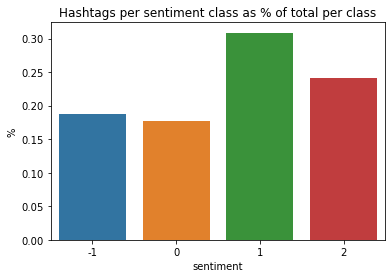

In [14]:
# Plot hashtag count %
sns.barplot(y=hashtag_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Hashtags per sentiment class as % of total per class")
plt.show()

#### Findings

There seems to be a large proportion of tweets with hashtags that is applicable to Pro climate change class (31%).
This could be showing some predictabilty with this feature

In [15]:
# Add RT count feature

def RT_count(text):
    if text[0:2]=='RT':
        count = 1
    else:
        count = 0
    return count

In [16]:
df_train['RT_count'] = df_train['message'].apply(RT_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0
1,1,It's not like we lack evidence of anthropogeni...,62,0,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1


In [17]:
# Get stats for RT count per sentiment class
stats_RT = df_train.groupby('sentiment')['RT_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
RT_perc = stats_RT/total_per_class
print(RT_perc)

sentiment
-1    0.526235
 0    0.458564
 1    0.674209
 2    0.584615
dtype: float64


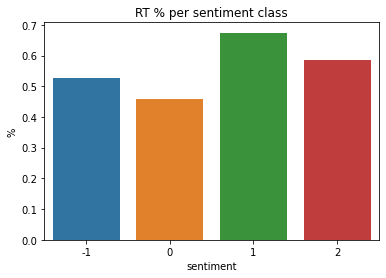

In [18]:
# Plot RT count %
sns.barplot(y=RT_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("RT % per sentiment class")
plt.show()

#### Findings

There seems to be a large proportion of Retweets applicable to Pro climate change (67%).
This could be showing some predictabilty with this feature

In [19]:
# Add punctuation (?!'") count feature

def punc_count(text):
    count_qm = 0
    count_em = 0
    count_sq = 0
    count_dq = 0
    
    count_qm = text.count('?')
    count_em = text.count('!')
    count_sq = text.count('\'')
    if count_sq % 2 != 0:
           count_sq = count_sq - 1
    count_dq = text.count('"')
    sum_count = count_qm + count_em + count_sq + count_dq     
    
    return sum_count

In [20]:
df_train['punc_count'] = df_train['message'].apply(punc_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0


In [21]:
# Get stats for punc count per sentiment class
stats_punc = df_train.groupby('sentiment')['punc_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
punc_perc = stats_punc/total_per_class
print(punc_perc)

sentiment
-1    0.851080
 0    0.693158
 1    0.569050
 2    0.328297
dtype: float64


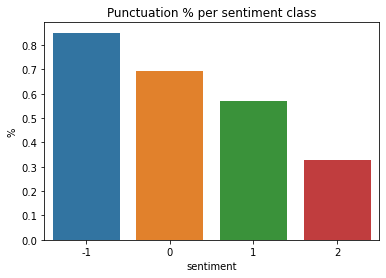

In [22]:
# Plot punc_count %
sns.barplot(y=punc_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Punctuation % per sentiment class")
plt.show()

#### Findings

There seems to be a large proportion of Retweets applicable to Anti climate change (85%),
with decreasing proportions across the other classes.
This could be showing some predictabilty with this feature

In [23]:
# add word count feature

def word_count(text):

    # search if RT then search the :, count from that
    if text[0:2]=='RT':
        pos = text.find(':')
        text = text[pos:]
    
    text_list = text.split()
    
    return len(text_list)

In [24]:
df_train['tweet_word_count'] = df_train['message'].apply(word_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0,18
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0,17


In [25]:
# Descriptive statistics for tweet word count per sentiment class
df_train.groupby('sentiment')['tweet_word_count'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,17.831019,16.078623,18.184877,14.776099
std,4.450499,5.502413,3.926267,3.262894
min,1.000000,1.000000,1.000000,1.000000
25%,15.000000,12.000000,16.000000,12.000000
50%,19.000000,17.000000,19.000000,15.000000
75%,21.000000,20.000000,21.000000,17.000000
max,29.000000,31.000000,31.000000,25.000000


#### Findings 

The mean word count does have slight difference between the different sentiment classes.
A mean difference significance test might be required or a correlation check.


In [26]:
# Add @ count feature

def at_count(text):
    count = 0
    count = text.count('@')
    return count

In [27]:
df_train['mentions_count'] = df_train['message'].apply(at_count)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19,1
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10,0
2,2,RT @RawStory: Researchers say we have three ye...,94,0,1,0,18,1
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,80,2,0,0,15,0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",103,1,1,0,17,1


In [28]:
# Get stats for @ count per sentiment class
stats_mention = df_train.groupby('sentiment')['mentions_count'].sum()
total_per_class = df_train.groupby('sentiment')['sentiment'].count()
mentions_perc = stats_mention/total_per_class
print(mentions_perc)

sentiment
-1    1.071759
 0    0.937527
 1    0.998828
 2    0.747253
dtype: float64


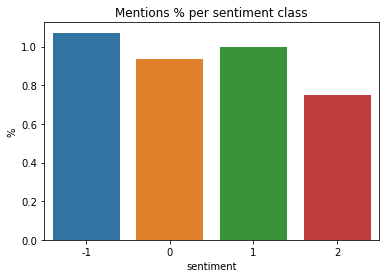

In [29]:
# Plot at_count %
sns.barplot(y=mentions_perc, x=[-1,0,1,2])
plt.xlabel("sentiment")
plt.ylabel("%")
plt.title("Mentions % per sentiment class")
plt.show()

#### Findings

There are more mentions applicable to class (-1, 1) i.e Anti and Pro climate change. The least number of mentions is News. The mean of more than 1, shows that more than one mention is observed in the tweet.

In [30]:
# Descriptive statistics for tweet word count per sentiment class
df_train.groupby('sentiment')['mentions_count'].describe().T

sentiment,-1,0,1,2
count,1296.000000,2353.000000,8530.000000,3640.000000
mean,1.071759,0.937527,0.998828,0.747253
std,0.839344,0.875259,0.726206,0.674074
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,6.000000,7.000000,7.000000,6.000000


Text(0.5, 0, 'tweet length')

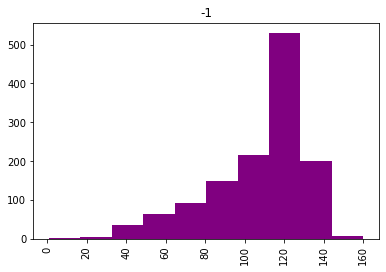

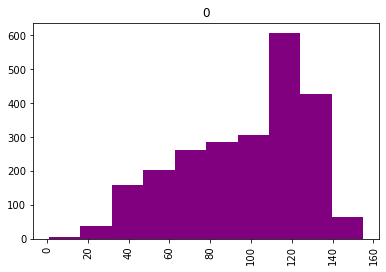

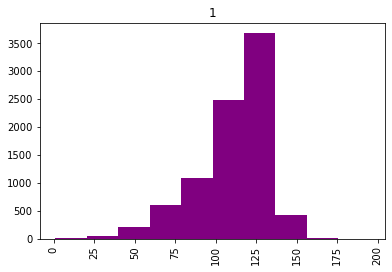

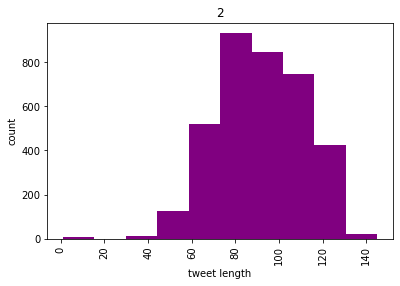

In [31]:
# plot relevant feature interactions

# tweet length histogram
df_train.groupby('sentiment')['tweet_length'].hist(by=df_train['sentiment'], color = 'purple')
plt.ylabel('count')
plt.xlabel('tweet length')

Text(0.5, 0, 'tweet length')

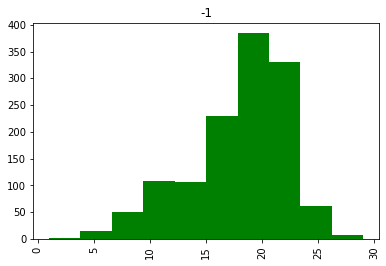

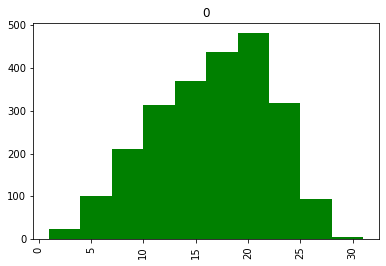

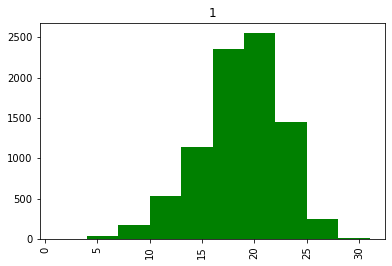

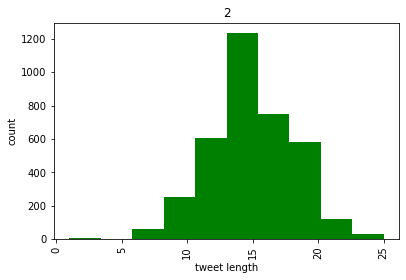

In [32]:
# tweet word count histogram
df_train.groupby('sentiment')['tweet_word_count'].hist(by=df_train['sentiment'], color = 'green')
plt.ylabel('count')
plt.xlabel('tweet length')

In [33]:
# Message Preprocessing

def clean_text_two(text):
    #text = str(text)
    text = re.sub('[\d-]', '', text) #remove any numbers
    text = re.sub(r'RT', '', text) #remove the retweets
    return text

In [34]:
# apply text cleaning two
df_train['message'] = df_train['message'].apply(clean_text_two)
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,PolySciMajor EPA chief doesn't think carbon di...,121,0,0,2,19,1
1,1,It's not like we lack evidence of anthropogeni...,62,0,0,0,10,0
2,2,@RawStory: Researchers say we have three year...,94,0,1,0,18,1
3,1,#TodayinMaker# WIRED : was a pivotal year in ...,80,2,0,0,15,0
4,1,"@SoyNovioDeTodas: It's , and a racist, sexist...",103,1,1,0,17,1


In [35]:
# Tokenize, Lemmatize, Stopwords

tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

def message_to_token(s):
    tokens = tokenizer.tokenize(s)
    lower_cased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lower_cased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]
    return useful_tokens

In [36]:
df_train['message'] = df_train['message'].apply(message_to_token)
df_train['message']= df_train['message'].apply(lambda x: " ".join(x))
df_train.head()

,sentiment,message,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
0,1,polyscimajor epa chief think carbon dioxide ma...,121,0,0,2,19,1
1,1,like lack evidence anthropogenic global warming,62,0,0,0,10,0
2,2,rawstory researcher say three year act climate...,94,0,1,0,18,1
3,1,todayinmaker wired wa pivotal year war climate...,80,2,0,0,15,0
4,1,soynoviodetodas racist sexist climate change d...,103,1,1,0,17,1


In [37]:
df_train.dtypes

sentiment            int64
message             object
tweet_length         int64
hashtag_count        int64
RT_count             int64
punc_count           int64
tweet_word_count     int64
mentions_count       int64
dtype: object

In [38]:
# Check for outliers: Values>3 indicate large outliers 

df_num = df_train.drop(['message'], axis = 1)
df_num.kurtosis() 

sentiment            0.122976
tweet_length         0.166845
hashtag_count       18.935808
RT_count            -1.799091
punc_count          67.595762
tweet_word_count    -0.072091
mentions_count       5.621192
dtype: float64

Text(0.5, 1.0, 'Boxplot: Hashtag Count')

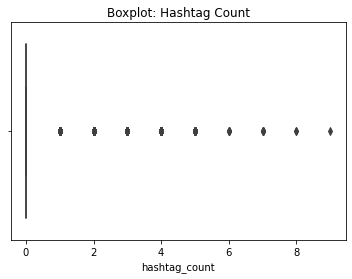

In [39]:
# Check boxplots for outlier values

sns.boxplot(x='hashtag_count', data=df_train)
plt.title('Boxplot: Hashtag Count')


Text(0.5, 1.0, 'Boxplot: Punctuation Count')

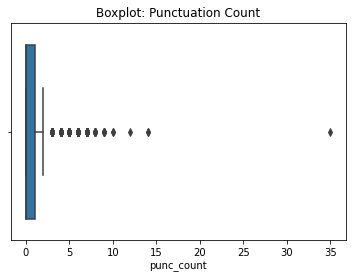

In [40]:
sns.boxplot(x='punc_count', data=df_train)
plt.title('Boxplot: Punctuation Count')

Text(0.5, 1.0, 'Boxplot: Mentions Count')

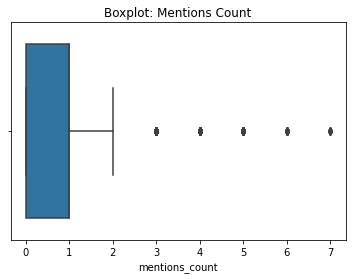

In [41]:
sns.boxplot(x='mentions_count', data=df_train)
plt.title('Boxplot: Mentions Count')

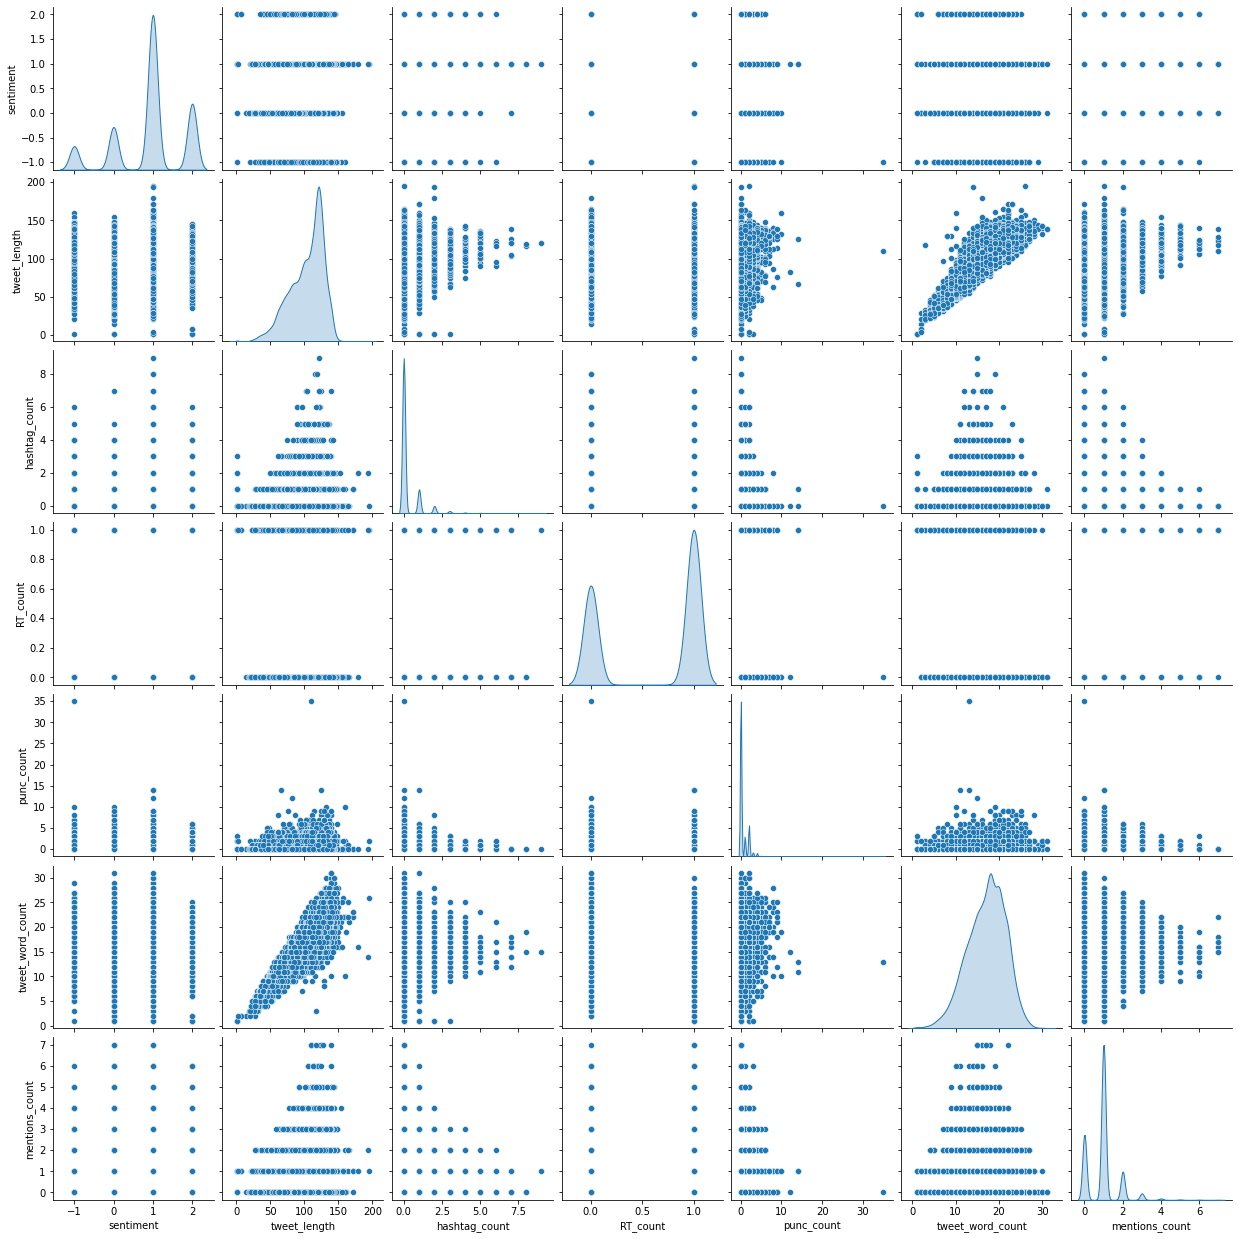

In [42]:
# feature interactions
sns.pairplot(df_train[['sentiment','tweet_length','hashtag_count','RT_count','punc_count','tweet_word_count','mentions_count']],diag_kind='kde')

#### Findings

Tweet length and Tweet word count is correlated which would be expected as one is a function of the other. One of the variables can be dropped due to the correlation. 

No material outliers found in the analysis.

In [43]:
# evaluate correlation

df_num = df_train.drop(['message'], axis = 1)
df_num.corr()

,sentiment,tweet_length,hashtag_count,RT_count,punc_count,tweet_word_count,mentions_count
sentiment,1.000000,-0.128002,0.036509,0.074389,-0.129680,-0.138936,-0.103909
tweet_length,-0.128002,1.000000,0.079693,0.128583,0.128397,0.880954,0.209489
hashtag_count,0.036509,0.079693,1.000000,-0.018445,-0.060955,-0.059771,-0.017948
RT_count,0.074389,0.128583,-0.018445,1.000000,0.002632,0.193688,0.454681
punc_count,-0.129680,0.128397,-0.060955,0.002632,1.000000,0.119963,0.014608
tweet_word_count,-0.138936,0.880954,-0.059771,0.193688,0.119963,1.000000,0.102549
mentions_count,-0.103909,0.209489,-0.017948,0.454681,0.014608,0.102549,1.000000


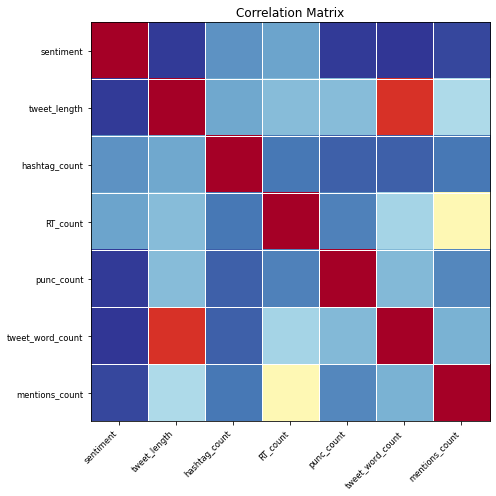

In [44]:
# Correlation Heatmap

fig = plt.figure(figsize=(7,7));
ax = fig.add_subplot(111);
plot_corr(df_num.corr(), xnames = df_num.corr().columns, ax = ax);

#### Findings:

The features **tweet_length, punc_count, tweet_word_count, mentions_count** have stronger correlation with **sentiment** than **hashtag_count** and **RT_count**. However, the correlations are weak (less than 0.5). This means it may not provide much predictability to the model.


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

#### See above for new features engineered i.e. tweet_length, punc_count, tweet_word_count, mentions_count, hashtag_count, RT_count
#### Once the new features where included in the modelling it did not provide better results and were consequently removed.

In [45]:
# Transform Test Data

df_test['message'] = df_test['message'].apply(clean_http)
df_test['message'] = df_test['message'].apply(clean_text_two)
df_test['message'] = df_test['message'].apply(message_to_token)
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x))
df_test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,fakewillmoore female orgasm cause global warmi...,872928


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [155]:
# Vectorizer Function

def vectorize_data(data, test):
    vectorizer = CountVectorizer(ngram_range = (1,2)) 
    
    # Below vectorizers or tunings did not yield better results
    #----------------------------------------------------------------------------------
    #vectorizer = CountVectorizer() 
    #vectorizer = TfidfVectorizer() 
    #vectorizer = TfidfVectorizer(ngram_range = (1,2), max_df = 0.5)
    #vectorizer = TfidfVectorizer(min_df = 0.0001, max_features = 600)
    #----------------------------------------------------------------------------------
    
    vector_data = vectorizer.fit_transform(data)
    test_data = vectorizer.transform(test)
    return vector_data, vectorizer, test_data

In [156]:
# Vectorize train data and get feature names

train_data, vectorizer, test_arr = vectorize_data(df_train['message'], df_test['message'])

feature_names = vectorizer.get_feature_names_out()  
feature_names


array(['______', '__branman', '__branman global', ...,
       '米国政府はある研究者に連絡して 申請書のアブストラクトに', 'ｎｈｋラジオ英会話', 'ｎｈｋラジオ英会話 より'],
      dtype=object)

In [157]:
# Split into X and y matix

y = df_train[['sentiment']]
X = train_data
X.shape

(15819, 105163)

In [49]:
#splitting into Train and Validation sets

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import KMeansSMOTE
from imblearn.combine import SMOTETomek

def split_data(X_data, y_data):
    
    X_train_s, X_valid_s, y_train_s, y_valid_s = train_test_split(X_data, y_data, test_size=0.20, random_state=42) 
    
    # Below sampling methods did not yield better results
    #---------------------------------------------------------------------------------------------
    #sampling = RandomOverSampler(random_state = 42, sampling_strategy='minority')
    #sampling = RandomOverSampler(random_state = 42)
    #sampling = ADASYN(random_state = 42, sampling_strategy='minority')
    #sampling = SMOTETomek(random_state = 42, sampling_strategy='minority')
    #sampling = SMOTE(random_state = 42, sampling_strategy='minority')
    #sampling = SMOTEENN(random_state = 42, sampling_strategy='minority')
    #sampling = BorderlineSMOTE(random_state = 42, sampling_strategy='minority')
    #sampling = SVMSMOTE(random_state = 42, sampling_strategy='minority')
    
    #sampling = RandomOverSampler(random_state = 42, sampling_strategy='not majority')
    
    #X_train_s, y_train_s = sampling.fit_resample(X_train_s, y_train_s)
    #----------------------------------------------------------------------------------------------
    
    return X_train_s, X_valid_s, y_train_s, y_valid_s

In [158]:
# Call split function

X_train, X_valid, y_train, y_valid = split_data(X,y)


In [159]:
## Import the var thresh model and choose a threshold

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0000001)

## Transform (i.e.: run selection on) the training data
X_train = selector.fit_transform(X_train)


## Now we'll need to remove the same features we did in the thresholding process
X_valid = selector.transform(X_valid)
test_arr = selector.transform(test_arr)


In [137]:
## Import the feature selector module

#from sklearn import feature_selection
#from sklearn.feature_selection import f_classif

### Set up selector, choosing score function and number of features to retain
#selector_kbest = feature_selection.SelectKBest(score_func=f_classif, k=90000)

## Transform (i.e.: run selection on) the training data
#X_train = selector_kbest.fit_transform(X_train, y_train)

## Before generating predictions, we'll need to transform the test data the same way we did the train data
#X_valid = selector_kbest.transform(X_valid)
#test_arr = selector_kbest.transform(test_arr)


In [160]:
X_valid.shape

(3164, 87827)

In [52]:
# Get f1-score

def f1_score_calc(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report)
    f1_score_out = df_report.iloc[2:3,4:5]
    return f1_score_out

In [53]:
# Model fitting

def fit_model(X_train_fit, y_train_fit, X_valid_fit, model_init):
    model_init.fit(X_train_fit, y_train_fit)
    predictions = model_init.predict(X_valid_fit)
    predictions_train = model_init.predict(X_train_fit)
    return predictions, predictions_train 


In [76]:
# Model 1: Random Forest Classifier

RF_model = RandomForestClassifier(max_depth = 40, random_state=42)
y_model_predicts, y_model_predicts_train  = fit_model(X_train, y_train, X_valid, RF_model)
print('Model 1: Random Forest Classifier')
RF_f1_train = f1_score_calc(y_train, y_model_predicts_train)
RF_f1 = f1_score_calc(y_valid, y_model_predicts)
RF_f1

Model 1: Random Forest Classifier


,accuracy
f1-score,0.633059


In [77]:
report = classification_report(y_valid, y_model_predicts)
print(report)  

              precision    recall  f1-score   support

          -1       0.53      0.14      0.22       278
           0       0.45      0.27      0.34       425
           1       0.67      0.81      0.73      1755
           2       0.61      0.61      0.61       706

    accuracy                           0.63      3164
   macro avg       0.56      0.46      0.47      3164
weighted avg       0.61      0.63      0.61      3164



#### Findings

Random forest has very low F1 scores on smaller sampled -1, 0 and 2 classes.
Accuracy on 1 is also very low in comparison to other models. Class imbalance seems to be impacting results


In [ ]:
# Results from tuning
# 10%,100 = 66   max depth 40
# 1%,200 = 68    max depth 40
# 0.0005, 400    max depth 40 = 68.7421
# 0.0005, 500    max depth 40 = 68.99
# 0.0001, 500    max depth 40 = 69.21
# 0.0001, 600    max depth 40 = 69.6587
# 0.0001, 600    max depth 40 and added features 70.41  ---------------------------------
# add feat1 (same as above hp) = 70.25
# add feat 2 = 69.97
# add feat 3 = 69.94
# add feat 4 = 70.1
# add feat 5 = 70.32

In [ ]:
# Model 2: Decision Tree Classifier

decision_tree_model = DecisionTreeClassifier(max_depth = 25, random_state=42)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, decision_tree_model)
print('Model 2: Decision Tree Classifier')
DT_f1_train = f1_score_calc(y_train, y_model_predicts_train)
DT_f1 = f1_score_calc(y_valid, y_model_predicts)
DT_f1

In [ ]:
report = classification_report(y_valid, y_model_predicts)
print(report)

#### Findings
On average across the classes the precision is around 63%, which is lower than the Random Forest.
Again the smaller sampled classes have lower F1 scores but these are higher than the Random Forest.

In [ ]:
# Results from tuning:
# gini, max depth 25 = 65.77  --------------------
# added features 63.93
# add feat1 = 64.53
# add feat 2 = 64.15
# add feat 3 = 63.87
# add feat 4 = 63.93
# add feat 5 = 64.25

In [ ]:
# Model 3: Support Vector Machine (SVM)

svc = SVC(random_state = 42)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, svc)
print('Model 3: Support Vector Machine (SVM)')
SVM_f1_train = f1_score_calc(y_train, y_model_predicts_train)
SVM_f1 = f1_score_calc(y_valid, y_model_predicts)
SVM_f1

In [ ]:
report = classification_report(y_valid, y_model_predicts)
print(report)

#### Findings
Classes -1 and 0 classified with higher FN rates (recall) implying these were labelled as other classes instead.
Class 1 was good with 71% precision and 91% recall (showing low FP and FN). Class imbalance seems to impact the results

In [ ]:
# Results from tuning:
# linear, 70.8913
# rbf, 73.0405 default     ----------------------------------
# added features  57.86%
# add feat1 = 57.64 very long
# feat 2 = 57.71
# feat 4 = 57.83
# all vectors 73.89

In [154]:
# Model 4: Logistic Regression

Log_model = LogisticRegression(solver='liblinear', random_state=42, C = 5.5)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, Log_model)
print('Model 4: Logistic Regression')
MLR_f1_train = f1_score_calc(y_train, y_model_predicts_train)
MLR_f1 = f1_score_calc(y_valid, y_model_predicts)
MLR_f1


Model 4: Logistic Regression


,accuracy
f1-score,0.745259


In [130]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.78      0.45      0.57       278
           0       0.61      0.44      0.51       425
           1       0.78      0.87      0.82      1755
           2       0.77      0.79      0.78       706

    accuracy                           0.76      3164
   macro avg       0.74      0.64      0.67      3164
weighted avg       0.75      0.76      0.75      3164



#### Findings
Classes -1 and 0 classified with higher FN rates (recall) implying these were labelled as other classes instead. However, 
has faired better than SVM on the lower samples.
Class 1 was good with 79% precision and 87% recall (showing low FP and FN). Class imbalance seems to impact the results


In [ ]:
# Results from tuning:
# lbfgs = 71.33  ------------------------
# added features 61%
# added feat 1 69.02%
# added feat 2 67.03
# added feat 3 64.44
# added feat 4 62.48
# added feat 5 59.73
# all vectroizers = 73.79

In [ ]:
# Model 5: Naive Bayes

naive_bayes_model = MultinomialNB()
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, naive_bayes_model)
print('Model 5: Naive Bayes')
NB_f1_train = f1_score_calc(y_train, y_model_predicts_train)
NB_f1 = f1_score_calc(y_valid, y_model_predicts)
NB_f1

In [ ]:
report = classification_report(y_valid, y_model_predicts)
print(report)

#### Findings
Higher average precision and recall than Decision Tree model. The classes -1 and 0 still show lower F1 scores.
However, class 2 is an improvement on F1 scores compared to Random Forest and Decision Trees.


In [ ]:
# Results from tuning:
# added features 67.54
# added feat1 67.92
# added feat2 68.36  ----------------
# added feat3 68.04
# added feat 4 67.44
# added feat 5 67.54

In [117]:
# Model 6: XG Boost

XG_Boost_model = xgb.XGBClassifier()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)

y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, XG_Boost_model)
print('Model 6: XG Boost')
XG_f1_train = f1_score_calc(y_train, y_model_predicts_train)
XG_f1 = f1_score_calc(y_valid, y_model_predicts)
XG_f1

Model 6: XG Boost


,accuracy
f1-score,0.71397


In [118]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.33      0.46       278
           1       0.65      0.30      0.41       425
           2       0.72      0.87      0.79      1755
           3       0.72      0.72      0.72       706

    accuracy                           0.71      3164
   macro avg       0.71      0.55      0.59      3164
weighted avg       0.71      0.71      0.69      3164



#### Findings

Slightly weaker but similar performance to Naive Bayes


In [ ]:
# Results from tuning:
# added feat 5 = 70.95
# original data = 70.54

In [ ]:
#Model 7: CatBoost ------ removed due to high runtime and lower performance

#CB_model = ctb.CatBoostClassifier()
#X_train, X_valid, y_train, y_valid = split_data(X,y)
#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, CB_model)
#print('Model 7: CatBoost')
#CB_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#CB_f1 = f1_score_calc(y_valid, y_model_predicts)
#CB_f1


In [119]:
#Model 8: Passive Aggressive 

PA_model = PassiveAggressiveClassifier(random_state=42, C=0.002)
X_train, X_valid, y_train, y_valid = split_data(X,y)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, PA_model)
print('Model 8: Passive Aggressive Classifier')
PA_f1_train = f1_score_calc(y_train, y_model_predicts_train)
PA_f1 = f1_score_calc(y_valid, y_model_predicts)
PA_f1


Model 8: Passive Aggressive Classifier


,accuracy
f1-score,0.759798


In [120]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.78      0.49      0.60       278
           0       0.58      0.47      0.52       425
           1       0.80      0.85      0.82      1755
           2       0.75      0.82      0.78       706

    accuracy                           0.76      3164
   macro avg       0.72      0.66      0.68      3164
weighted avg       0.75      0.76      0.75      3164



#### Findings
Similar performance to SGD model

In [ ]:
#Model 9: KNN

n_neighbors = 3
KNN_model = KNeighborsClassifier(n_neighbors)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, KNN_model)
print('Model 9: KNN')
KNN_f1_train = f1_score_calc(y_train, y_model_predicts_train)
KNN_f1 = f1_score_calc(y_valid, y_model_predicts)
KNN_f1


In [ ]:
report = classification_report(y_valid, y_model_predicts)
print(report)

#### Findings

This model yielded the lowest results on both precision and F1 scores.
An interesting observation was that the precision for Class 2 was the highest than for any other model, and seems to 
classify Class 2 better. However, performed poorer on the other classes.

In [ ]:
# Results from tuning:
# best with countvec, n=3  58.9

In [146]:
# Model 10: SGD Classifier

from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state = 42, penalty = 'elasticnet', learning_rate = 'adaptive', eta0 = 0.0151)
y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, sgd_model)
print('Model 10: SGD Classifier')
SGD_f1_train = f1_score_calc(y_train, y_model_predicts_train)
SGD_f1 = f1_score_calc(y_valid, y_model_predicts)
SGD_f1

Model 10: SGD Classifier


,accuracy
f1-score,0.758534


In [147]:
report = classification_report(y_valid, y_model_predicts)
print(report)

              precision    recall  f1-score   support

          -1       0.78      0.51      0.61       278
           0       0.56      0.46      0.51       425
           1       0.79      0.85      0.82      1755
           2       0.76      0.81      0.78       706

    accuracy                           0.76      3164
   macro avg       0.72      0.66      0.68      3164
weighted avg       0.75      0.76      0.75      3164



#### Findings

This was the best performing model, with high precision, recall and F1 scores.
The small sample classes (-1,0) also performed better compared to the other models.

In [ ]:
# Model 11: Neural Network ------ removed due to high runtime and lower performance

#from sklearn.neural_network import MLPClassifier

#MPL_NN_model = MLPClassifier(random_state=42, max_iter=3, early_stopping = True, activation = 'tanh', 
#                             hidden_layer_sizes = (400,), verbose = True) 
                             
#X_train, X_valid, y_train, y_valid = split_data(X,y)
#y_model_predicts, y_model_predicts_train = fit_model(X_train, y_train, X_valid, MPL_NN_model)
#print('Model 11: Neural Network')
#MPL_f1_train = f1_score_calc(y_train, y_model_predicts_train)
#MPL_f1 = f1_score_calc(y_valid, y_model_predicts)
#MPL_f1


In [ ]:
#report = classification_report(y_valid, y_model_predicts)
#print(report)

In [165]:
import lightgbm as lgb

LGB_model = lgb.LGBMClassifier()
y_model_predicts, y_model_predicts_train = fit_model(X_train.toarray(), y_train, X_valid, LGB_model)
print('Model 12: LGM Classifier')
LGM_f1_train = f1_score_calc(y_train, y_model_predicts_train)
LGM_f1 = f1_score_calc(y_valid, y_model_predicts)
LGM_f1


MemoryError: Unable to allocate 4.14 GiB for an array with shape (1111450685,) and data type float32

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

# Dictionary of results
results_dict = {'F1 (Valid)':
                    {
                        "Random Forest Classifier": RF_f1.iat[0,0],
                        "Decision Tree Classifier": DT_f1.iat[0,0],
                        "Support Vector Machine (SVM)": SVM_f1.iat[0,0],
                        "Logistic Regression": MLR_f1.iat[0,0],
                        "Naive Bayes": NB_f1.iat[0,0],
                        "XG Boost": XG_f1.iat[0,0],
                      #  "CatBoost": CB_f1.iat[0,0],
                        "KNN": KNN_f1.iat[0,0],
                        "Passive Aggressive": PA_f1.iat[0,0],
                        "SGD": SGD_f1.iat[0,0] 
                    },
                
                'F1 (Train)':
                    {
                        "Random Forest Classifier": RF_f1_train.iat[0,0],
                        "Decision Tree Classifier": DT_f1_train.iat[0,0],
                        "Support Vector Machine (SVM)": SVM_f1_train.iat[0,0],
                        "Logistic Regression": MLR_f1_train.iat[0,0],
                        "Naive Bayes": NB_f1_train.iat[0,0],
                        "XG Boost": XG_f1_train.iat[0,0],
                       # "CatBoost": CB_f1_train.iat[0,0],
                        "KNN": KNN_f1_train.iat[0,0],
                        "Passive Aggressive": PA_f1_train.iat[0,0],
                        "SGD": SGD_f1_train.iat[0,0] 
                    },
                            
                  }

In [ ]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df.sort_values(by=['F1 (Valid)'], ascending = False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results_df.sort_values('F1 (Valid)', ascending=False, inplace=True)
results_df.plot(y=['F1 (Valid)'], kind='bar', ax=ax[0], xlim=[0,1.1])
results_df.plot(y='F1 (Train)', kind='bar', ax=ax[1])

**Best model motivation**

Best model was the SGD Classifier model.
Although this did not give the highest F1 validation score, it handled unseen data better with the highest **kaggle F1 score of 0.74253**, compared to the other classifier models and also ran quicker than the other models.

Despite feature engineering, extensive hypertuning (both on the vectorizers as well as the classifier models), application of resampling methods (to address data imbalance), application of class_weights in the models (to reweight the data), and applying various models, the F1 score did not improve from the best model above. 

Additional models, Catboost classifier (Model 7) and a tuned neural network based classifier (Model 11: MPL Classifier) was also applied to the data but again did not provide better F1 scores than the SGD model and ran for a considerable amount of time. These models were consquently removed from the comparison.

Additional data can be collected for the smaller sample sentiment classes (-1, 0) in order to improve the F1 scores on these classes as the general theme across the models were low F1 scores on these classes.

One observation was that the linear models seem to classify better or provide better F1 scores on the data. Maybe other optimised linear models, similar to SGD can be investigated for future modelling.


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

**Discuss chosen methods logic**

SGD (Stochastic Gradient Descent) Classifier was the chosen model 

SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD.
The underlying classifier model is the SVM with default parameters of the 'hinge' loss function (i.e. soft-margin linear Support Vector Machine)

SGD is used to find the model parameters that correspond to the best fit between predicted and actual outputs.

The objective of regression, is to minimize the sum of squared residuals. A function reaches its minimum value when the slope (gradient) is equal to 0. Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function, to minimise the error. Where the optimal points cannot be found by equating the slope of the function to 0 to minimise the error, this algorithm can be used to descend down the slope to find the lowest point. SGD can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate (calculated from a randomly selected subset of the data). In high-dimensional optimization problems this reduces the very high computational burden (i.e. speed it takes to compute the model), achieving faster iterations in exchange for a lower convergence rate. 

In this analysis, the number of features used where quite a large number (105,163) and therefore the speed of the SGD classifier assisted to considerably improve computation time, compared to other models.

In terms of the underlying model, SVM or Support Vector Machine, this is a linear model and can be used for both classification and regression problems. The model works by creating a line or a hyperplane which separates the data into the different classes. SVM tries to make a decision boundary between the classes that maximises the distance between the classes. This is to create clarity for the model to easily distinguish between classes and avoid misclassification. 

<a id="six"></a>
## 8. Submission to Kaggle
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Submission to Kaggle

best_model = sgd_model
predictions = best_model.predict(test_arr)
submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment':predictions})
submission.to_csv('submission_Diane_Govindan_Best_Model_SGD.csv', index=False)
predictions.shape
